In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, solve, inv
from mpl_toolkits import mplot3d

In [2]:
f = lambda x: -(x[0]- 1)**2 - 2*(x[1] - 1)**2
g = lambda x: np.array([-2*(x[0]-1), -4*(x[1]-1)]) # the peak will be 1,1 -> look at the number behind the variable
H = lambda x: np.array([[-2.0, 0.0],[0.0, -4.0]])

"""
x = start point
f = obj
g = vector -> gradient
"""

'\nx = start point\nf = obj\ng = vector -> gradient\n'

In [3]:
def plot_surface(obj, fig, ax):
    nc = 100; nr =100
    xlist = np.linspace(-5.0, 5.0, nc)
    ylist = np.linspace(-5.0, 5.0, nr)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros((nc, nr))
    for i in range(nc):
        Z[:, i] = obj([X[:,i], Y[:,i]])
    cp = ax.plot_surface(X, Y, Z)
    return

def plot_contour(obj, fig, ax):
    nc = 100; nr =100
    xlist = np.linspace(-5.0, 5.0, nc)
    ylist = np.linspace(-5.0, 5.0, nr)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros((nc, nr))
    for i in range(nc):
        Z[:, i] = obj([X[:,i], Y[:,i]])
    cp = ax.contour(X, Y, Z)
    return

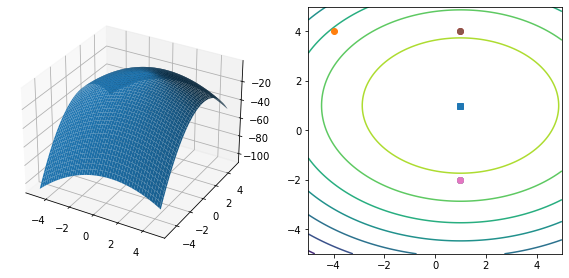

In [4]:
xs = np.array([1.0, 1.0])
fig = plt.figure(1, figsize = (10, 10)); plt.clf( ); ax = fig.add_subplot(221, projection = "3d")
plot_surface(f, fig, ax)
ax1 = fig.add_subplot(222)
plot_contour(f, fig, ax1)
ax1.plot(xs[0], xs[1], 's')

x0 = np.array([-4, 4])
ax1.plot(x0[0], x0[1], "o")

x = x0
alpha = 0.5
for i in range(5):
    x = x+alpha*g(x)
    ax1.plot(x[0], x[1], 'o')
    if norm(g(x)) < 1.0E-6: break

In [5]:
# newton method
x = np.array([-4.0, 4.0]); print("starting point = {0}".format(x))
x = x - inv(H(x)).dot(g(x))
print("after one iteration = {}".format(x))

starting point = [-4.  4.]
after one iteration = [1. 1.]


In [6]:
def newton(f, g, H, x0):
    x = x0
    while 1:
        # x = x - inv(H(x).dot(g(x))) -> slower
        x = x - solve(H(x), g(x))
        if norm(g(x)) <1.0E-6: break
    return x

In [7]:
newton(f, g, H, [-4, 4])

array([1., 1.])

In [8]:
def steepest(f, g, x0):
    x = x0
    alpha = 0.01 # this is the step/increment
    while 1:
        # x = x+alpha*g(x) # change into x = x - alpha*g(x) for steepest descent
        x = x-alpha*g(x)
        if norm(g(x)) < 1.0E-6: break
    return x

In [9]:
steepest(f, g, [-10, 10])

<ipython-input-2-66a125939de6>:2: RuntimeWarning: overflow encountered in double_scalars
  g = lambda x: np.array([-2*(x[0]-1), -4*(x[1]-1)]) # the peak will be 1,1 -> look at the number behind the variable


KeyboardInterrupt: 

In [10]:
# test problem
fTest = lambda x: 6*x[0]**2 + 3*x[1]**3 + x[0]*x[1]
gTest = lambda x:np.array([12*x[0] + x[1], 3*x[1]**2 + x[0]])
HTest = lambda x:np.array([[12, 1], [1, 6*x[1]]])

In [16]:
print(newton(fTest, gTest, HTest, [10, 10]))
print(steepest(fTest, gTest, [10, 10]))

[-0.00231484  0.02777809]
[-0.00231582  0.02778981]
